In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive

/content/drive/My Drive


(720, 1280, 3)
<type 'numpy.ndarray'>


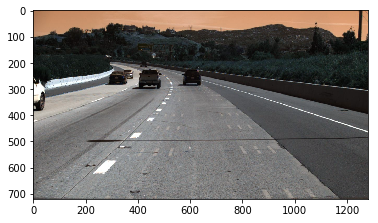

In [3]:
# Python3
import cv2
import matplotlib.pyplot as plt
import numpy as np

# img = cv2.imread("src5.jpg")
img = cv2.imread("10.jpg")
print(img.shape)
print(type(img))

plt.figure()
plt.imshow(img)

In [0]:
H , W , _ = img.shape

In [0]:
M = np.array([[0.954906       , 0.000000      ,  430],
[-0.024030      , 0.997664   ,     260],
[-0.000046    ,  0.0000100      ,  1]])
M = np.linalg.inv(M)

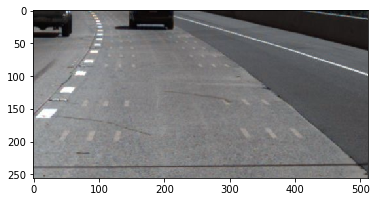

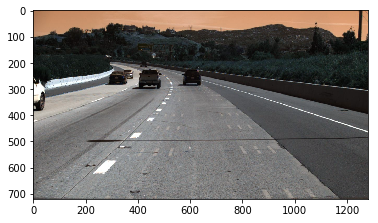

In [6]:
out = cv2.warpPerspective(img,M,(512,256),flags=cv2.INTER_LINEAR)
# out2 = cv2.warpPerspective(img,M4,(0, 0),flags=cv2.INTER_LINEAR)
# print(out.shape)
plt.figure()
plt.imshow(out)
plt.show()
plt.figure()
plt.imshow(img)
# plt.figure()
# plt.imshow(out2)
# plt.show()

In [7]:
height = 256 #846
width = 512 #1152

dim = (width, height)
res_img = cv2.resize(out, dim, interpolation = cv2.INTER_NEAREST) 
print(res_img.shape)

img_yuv = cv2.cvtColor(res_img, cv2.COLOR_BGR2YUV_I420)
print(img_yuv.shape)

y_ul = []
y_ur = []
y_dl = []
y_dr = []

width = 256 #846
height = 512 #1152

(256, 512, 3)
(384, 512)


In [0]:
for i in range(width): 
    for j in range(height): 
      if (i % 2 == 0 and j%2 == 0):
        y_ul.append(img_yuv[i , j]) 
      elif (i % 2 != 0 and j%2 == 0): 
        y_ur.append(img_yuv[i , j]) 
      elif (i % 2 == 0 and j%2 != 0):
        y_dl.append(img_yuv[i , j]) 
      else:
        y_dr.append(img_yuv[i , j])

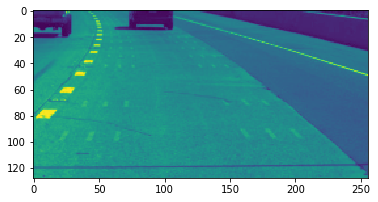

(6, 128, 256)
(6, 128, 512)
(1, 12, 128, 256)


In [9]:
y_ul = np.reshape(y_ul, (128, 256))
y_ur = np.reshape(y_ur, (128, 256))
y_dl = np.reshape(y_dl, (128, 256))
y_dr = np.reshape(y_dr, (128, 256))
img_yuv_flat = img_yuv.flatten()
U = img_yuv_flat[131072 : 163840]
V = img_yuv_flat[163840::]
U = np.reshape(U, (128, 256))
V = np.reshape(V, (128, 256))
plt.figure()
plt.imshow(y_dl)
plt.show()
merge = np.vstack([[y_ul],[y_dl],[y_ur],[y_dr], [U], [V]])
# merge1 = np.vstack([merge,merge])
merge1 = cv2.merge((merge,merge))
print(np.shape(merge))
print(np.shape(merge1))
merge2 = np.reshape(merge1,(1,12,128,256))
print(np.shape(merge2))


In [10]:
!pip install keras==2.1.1

In [11]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [13]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import load_model
from keras.models import Model
from keras.models import load_model
from keras import __version__ as keras_version
desire = np.random.randint(10, size=(1, 8))
rnn = np.random.randint(10, size=(1, 512))
model = tf.keras.models.load_model("/content/drive/My Drive/supercombo.keras")
model.predict([merge2,desire,rnn])
# predictions = model.predict(merge2, batch_size=128)
# print("predictions", pred1, pred2, pred3,pred4, pred5, pred6,pred7)


W0329 19:04:03.998766 139836935554944 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


[array([[ 1.11190307e+00,  1.18433738e+00,  8.96069646e-01,
          1.03924525e+00,  9.71410930e-01,  6.48128271e-01,
          3.32646489e-01,  3.29471901e-02, -5.42931795e-01,
         -1.05472505e+00, -1.66612542e+00, -2.47847629e+00,
         -3.17679906e+00, -4.06301260e+00, -5.03569460e+00,
         -6.23695087e+00, -7.19785976e+00, -8.59934711e+00,
         -9.95349693e+00, -1.14100971e+01, -1.23415108e+01,
         -1.37231941e+01, -1.49054136e+01, -1.61890469e+01,
         -1.75023117e+01, -1.89138565e+01, -2.00104504e+01,
         -2.14511948e+01, -2.28710537e+01, -2.39165707e+01,
         -2.53692303e+01, -2.68913002e+01, -2.81685867e+01,
         -2.97937298e+01, -3.12784348e+01, -3.29013443e+01,
         -3.40146751e+01, -3.54863472e+01, -3.64261017e+01,
         -3.78222389e+01, -3.89762993e+01, -4.03189392e+01,
         -4.16818466e+01, -4.25353317e+01, -4.37111015e+01,
         -4.51485710e+01, -4.56955681e+01, -4.67090302e+01,
         -4.78866920e+01, -4.87305527e+0